In [1]:
#install.packages("pROC")
library(rpart)
library(pROC)
df <- read.csv("clean_data.csv", header = TRUE)
summary(df) 


Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



       X                   user         gender            age       
 Min.   :     0   debora     :51577   Man  : 64259   Min.   :28.00  
 1st Qu.: 41408   jose_carlos:13161   Woman:101374   1st Qu.:28.00  
 Median : 82816   katia      :49797                  Median :31.00  
 Mean   : 82816   wallace    :51098                  Mean   :38.27  
 3rd Qu.:124224                                      3rd Qu.:46.00  
 Max.   :165632                                      Max.   :75.00  
                                                                    
 how_tall_in_meters     weight      body_mass_index       x1          
 1,58:49797         Min.   :55.00   22,0:49797      Min.   :-306.000  
 1,62:51577         1st Qu.:55.00   24,0:13161      1st Qu.: -12.000  
 1,67:13161         Median :75.00   28,4:51098      Median :  -6.000  
 1,71:51098         Mean   :70.82   28,6:51577      Mean   :  -6.649  
                    3rd Qu.:83.00                   3rd Qu.:   0.000  
                    Ma

In [2]:
##information gain
info.gain <- function(x,y){
  IG <- 0
  df <- data.frame(x,y)
  table_y <- table(y)
  prob_table_y <-  data.frame(prop.table(table_y))
  x_entropy <-c()
  cond_entropy <-c()
  for (i in 1:nrow(prob_table_y)) {
    p_y <- prob_table_y[i,2]
    y_cat <- as.character(prob_table_y[i,1])
    x_value <- subset(df, y == y_cat)[,1]
    x_entropy[i] <- entropy(x_value) * p_y
  }
  cond_entropy <- sum(x_entropy)
  

  IG <- entropy(x)-cond_entropy
  return(IG)
}

In [22]:
# Information-gain-based feature selection: exhaustive search
# Input: df is a data frame with last column being the output attribute
#        m: size of feature set, default is 1
# Output: data frame with name(s) of selected feature(s), information gain, relative information gain, sorted by the value of information gain
features <- function(df, m = 1, output){
  
  output.idx <- which(colnames(df)==output)
  idx <- setdiff(1:ncol(df), output.idx) #The elements of setdiff(x,y) are those elements in x but not in y
  nf <- ncol(df) -1 #number of input features
 
  output <- df[, output.idx]  # output column
  outputH <- entropy(output) # entropy for output
  idx.list <- combn(idx, m) #a matrix storing all combinations of size m from idx
  IG.res <-NULL #output data frame
  #iterate through all combination of index 
  for (ii in 1:ncol(idx.list)){
    this.idx <- idx.list[, ii]  
    input.df <- data.frame(df[,this.idx]) 
    
    #create a vector each element is concatenation of all values of a row of a data frame
    this.input <- apply(input.df, 1, paste, collapse='') 
    
    #create new feature name which is a concatenation of feature names in a feature set
    this.input.names <- paste(names(df)[this.idx], collapse=' ')    
    this.IG <-info.gain(this.input,output) #information gain
    # this.RIG <- this.IG / outputH #relative information gain
    this.res <- data.frame(feature = this.input.names, IG = this.IG) #assemble a df
    IG.res <- rbind(IG.res, this.res) #concatenate the results    
  }
  
  sorted <- IG.res[order(-IG.res$IG), ] #sort by information gain in descending order
  return (sorted)
}

In [3]:
#(Use a 80 (train):20(test) test split method
set.seed(430)

df_debora <- subset(df, df$user == "debora")
df_debora$values <-ifelse(df_debora$class == "sitting", 0,
                          ifelse(df_debora$class == "sittingdown", 1,
                                 ifelse(df_debora$class == "standing", 2,
                                        ifelse(df_debora$class == "standingup", 3, 4))))
df_debora

,X,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,⋯,y2,z2,x3,y3,z3,x4,y4,z4,class,values
1,0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,⋯,18,-19,5,104,-92,-150,-103,-147,sitting,0
2,1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,⋯,18,-18,-14,104,-90,-149,-104,-145,sitting,0
3,2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,⋯,20,-15,-13,104,-90,-151,-104,-144,sitting,0
4,3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,⋯,21,-16,-13,104,-89,-153,-103,-142,sitting,0
5,4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,⋯,20,-15,-13,104,-89,-153,-104,-143,sitting,0
6,5,debora,Woman,46,"1,62",75,"28,6",-2,95,-62,⋯,19,-16,-13,104,-89,-153,-104,-142,sitting,0
7,6,debora,Woman,46,"1,62",75,"28,6",1,100,-62,⋯,22,-12,-13,104,-90,-151,-104,-143,sitting,0
8,7,debora,Woman,46,"1,62",75,"28,6",-1,97,-63,⋯,20,-15,-12,104,-88,-151,-104,-142,sitting,0
9,8,debora,Woman,46,"1,62",75,"28,6",-1,98,-63,⋯,19,-17,-13,104,-90,-152,-103,-144,sitting,0
10,9,debora,Woman,46,"1,62",75,"28,6",0,98,-61,⋯,22,-13,-13,104,-90,-151,-104,-144,sitting,0


In [8]:
#select data  from  df_debora: 1000 for each class

data_sitting_debora <- subset(df_debora, df_debora$values == 0)[1:15,]
data_sittingdown_debora <- subset(df_debora, df_debora$values == 1)[1:15,]
data_standing_debora <- subset(df_debora, df_debora$values == 2)[1:15,]
data_standingup_debora <- subset(df_debora, df_debora$values == 3)[1:15,]
data_walking_debora <- subset(df_debora, df_debora$values == 4)[1:15,]
df_try <- rbind(data_sitting_debora, 
                data_sittingdown_debora, 
                data_standing_debora,
                data_standingup_debora,
                data_walking_debora)
df_try <- data.frame(df_try)
df_try

,X,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,⋯,y2,z2,x3,y3,z3,x4,y4,z4,class,values
1,0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,⋯,18,-19,5,104,-92,-150,-103,-147,sitting,0
2,1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,⋯,18,-18,-14,104,-90,-149,-104,-145,sitting,0
3,2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,⋯,20,-15,-13,104,-90,-151,-104,-144,sitting,0
4,3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,⋯,21,-16,-13,104,-89,-153,-103,-142,sitting,0
5,4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,⋯,20,-15,-13,104,-89,-153,-104,-143,sitting,0
6,5,debora,Woman,46,"1,62",75,"28,6",-2,95,-62,⋯,19,-16,-13,104,-89,-153,-104,-142,sitting,0
7,6,debora,Woman,46,"1,62",75,"28,6",1,100,-62,⋯,22,-12,-13,104,-90,-151,-104,-143,sitting,0
8,7,debora,Woman,46,"1,62",75,"28,6",-1,97,-63,⋯,20,-15,-12,104,-88,-151,-104,-142,sitting,0
9,8,debora,Woman,46,"1,62",75,"28,6",-1,98,-63,⋯,19,-17,-13,104,-90,-152,-103,-144,sitting,0
10,9,debora,Woman,46,"1,62",75,"28,6",0,98,-61,⋯,22,-13,-13,104,-90,-151,-104,-144,sitting,0


In [9]:
data_idx <- sample(1:nrow(df_try), nrow(df_try)*0.8)
data_trn <- df_try[data_idx,]
data_tst <- df_try[-data_idx,]



In [10]:
price_rpart <- rpart(values ~ ., data = data_trn, method = 'class')
  


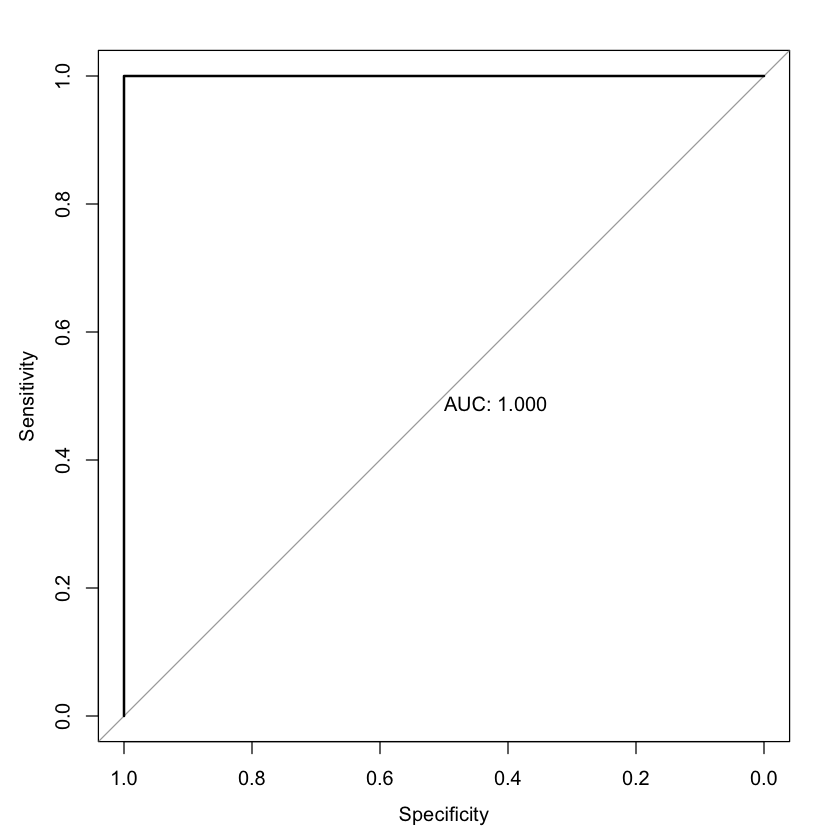

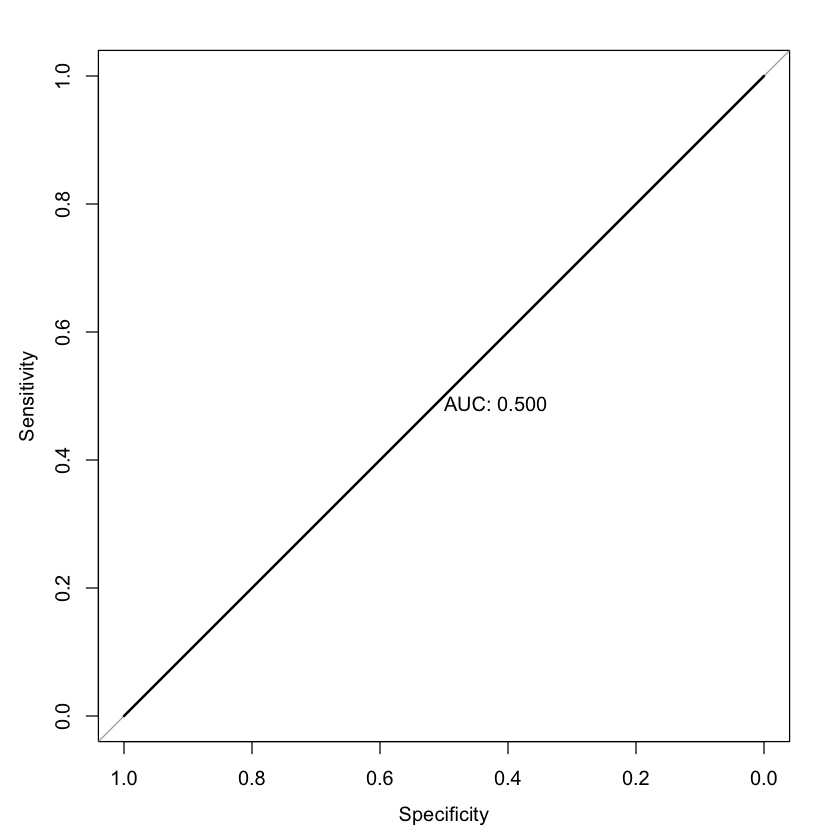

[1] 0.75

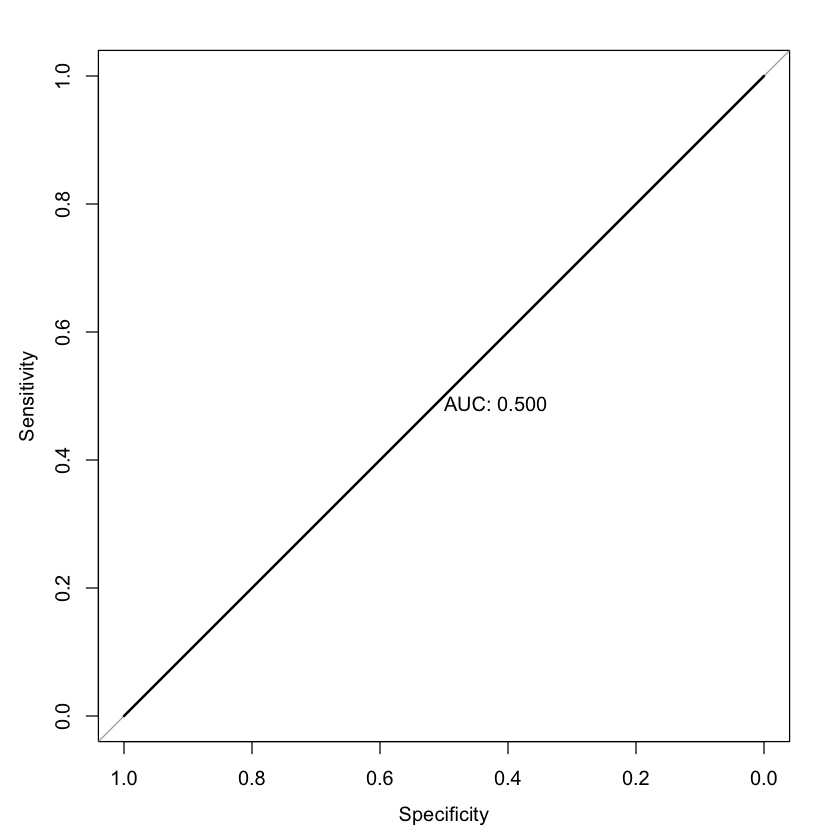

In [11]:
pre_test <- predict(price_rpart, newdata = data_tst, type = 'prob')
roc_test <- multiclass.roc(data_tst$values ~ pre_test[,1], plot = TRUE, print.auc = TRUE)
as.numeric(roc_test$auc) 

In [13]:

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


[1] 0.01

ERROR: Error in rpart.plot(price_rpart_prune): could not find function "rpart.plot"


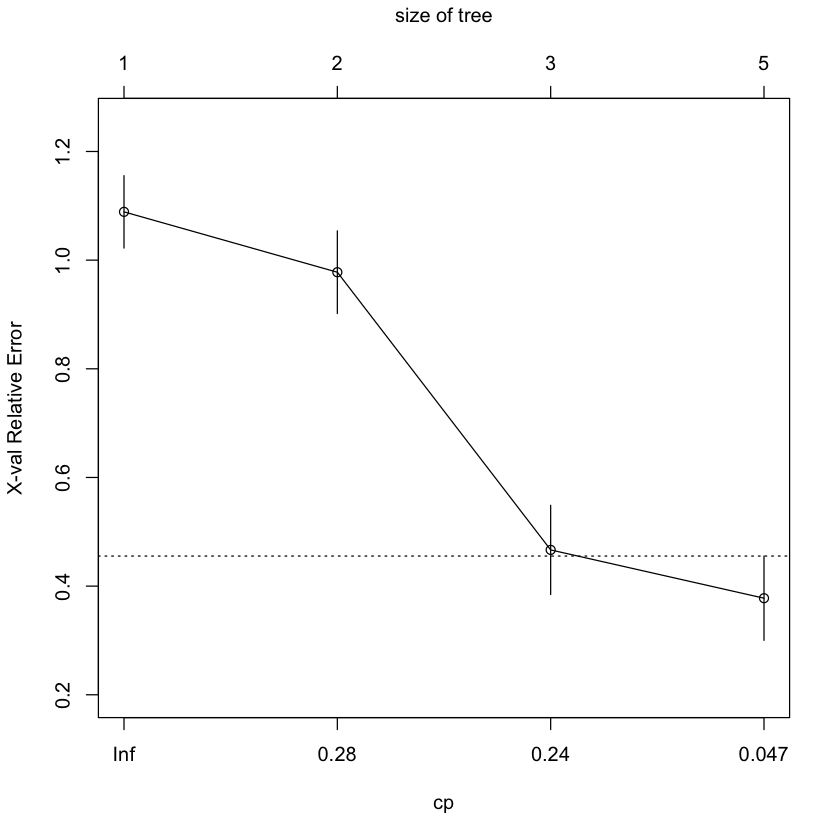

In [14]:
plotcp(price_rpart)
min_cp <- price_rpart$cptable[which.min(price_rpart$cptable[,"xerror"]),"CP"]
min_cp
price_rpart_prune <- prune(price_rpart, cp = min_cp)
rpart.plot(price_rpart_prune)
rpart.rules(price_rpart_prune, cover = TRUE)